In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("data.csv")

In [3]:
data

,Column1,Column2,Target
0,84,17,2
1,83,26,2
2,88,21,2
3,71,15,2
4,77,19,2
...,...,...,...
494,16,28,0
495,32,31,0
496,31,20,0
497,23,37,0


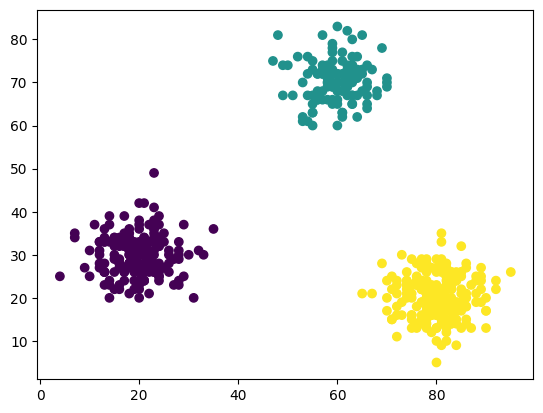

In [4]:
plt.figure()
plt.scatter(data['Column1'], data['Column2'], c=data['Target'])
plt.show()

In [6]:
class NeuralNetwork(object):
    def __init__(self):
        inputLayer = 2
        hiddenLayer1 = 8
        hiddenLayer2 = 8
        outLayer = 1

        self.learning_rate = 0.05

        self.W_H1I = np.random.randn(inputLayer, hiddenLayer1)
        self.W_H2H1 = np.random.randn(hiddenLayer1, hiddenLayer2)
        self.W_OH2 = np.random.randn(hiddenLayer2, outLayer)

    def sigmoid(self, x, der=False):
        if der == True:
            return x * (1 - x)
        else:
            return 1 / (1 + np.exp(-x))

    def feedForward(self, X):
        hidden1_input = np.dot(X, self.W_H1I)
        self.hidden1_output = self.sigmoid(hidden1_input)

        hidden2_input = np.dot(self.hidden1_output, self.W_H2H1)
        self.hidden2_output = self.sigmoid(hidden2_input)

        output_input = np.dot(self.hidden2_output, self.W_OH2)
        pred = self.sigmoid(output_input)
        return pred

    def backPropagation(self, X, Y, pred):

        output_error = Y - pred
        output_delta = self.learning_rate * output_error * self.sigmoid(pred, der=True)

        hidden2_error = output_delta.dot(self.W_OH2.T)
        hidden2_delta = hidden2_error * self.sigmoid(self.hidden2_output, der=True)

        hidden1_error = hidden2_delta.dot(self.W_H2H1.T)
        hidden1_delta = hidden1_error * self.sigmoid(self.hidden1_output, der=True)

        self.W_H1I += self.learning_rate * X.T.dot(hidden1_delta)
        self.W_H2H1 += self.learning_rate * self.hidden1_output.T.dot(hidden2_delta)
        self.W_OH2 += self.learning_rate * self.hidden2_output.T.dot(output_delta)

    def train(self, X, Y):
        output = self.feedForward(X)
        self.backPropagation(X, Y, output)

